# Load Ntuple and Print MCDecayString

In [1]:
%load_ext autoreload
%autoreload 2

import glob
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import sys
sys.path.append('/home/belle/zhangboy/inclusive_R_D/')
import utilities as util
import uproot

Welcome to JupyROOT 6.26/14


In [7]:
files = ['MC15ri_sigDDst_korat_e_3/sigDDst.root:B0', 
         #'MC15ri_normDDst_korat_e_1/normDDst.root:B0',
         #'MC15ri_Dststell2_korat_e_3/Dststell2.root:B0', 
         'MC15ri_DststTau1_korat_e_3/DststTau1.root:B0',
         'MC15ri_DststTau2_korat_e_3/DststTau2.root:B0']

with uproot.open(f'../Samples/Signal_MC15ri/{files[1]}') as file:
    df_test = pd.DataFrame(file.arrays(entry_start=0,entry_stop=None,library="np")) # exclude bkg

In [3]:
# Test Ntuple locations
files = ['MC_e_test.root:B0',]

df_test = uproot.concatenate([f'../Recon_scripts/{f}' for f in files],
                        library="np",)
                        #cut='DecayMode>0',
                        #filter_branch=lambda branch: branch.name in columns)
df_test = pd.DataFrame(df_test)
df_test.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
df_test.eval(f'p_D_l = D_CMS_p + ell_CMS_p', inplace=True)

array([[<AxesSubplot:title={'center':'B0_DstVeto_dM'}>,
        <AxesSubplot:title={'center':'B0_DstVeto_vtxReChi2'}>]],
      dtype=object)

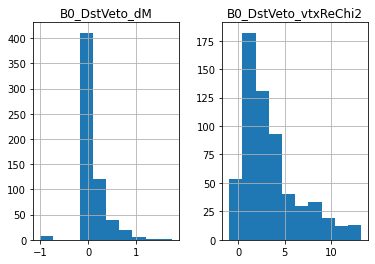

In [11]:
df_test[['B0_DstVeto_dM','B0_DstVeto_vtxReChi2']].hist()

In [5]:
df_test['B0_mcPDG'] = df_test['B0_mcPDG'].fillna(0)
df_test['D_mcPDG'] = df_test['D_mcPDG'].fillna(0)

In [28]:
df_test.columns

Index(['__experiment__', '__run__', '__event__', '__production__',
       '__candidate__', '__ncandidates__', '__MCDecayString__', '__weight__',
       'Ecms', 'ROEeidBDT',
       ...
       'e_genMotherPDG', 'e_mcErrors', 'e_mcPDG', 'e_dM', 'e_isBremsCorrected',
       'e_nPXDHits', 'e_isCloneTrack', 'e_d0_mcPDG', 'e_d1_mcPDG', 'e_pSig'],
      dtype='object', length=208)

In [11]:
df_test.eval(f'p_D_l = D_CMS_p + e_CMS_p', inplace=True)

In [7]:
index_list = [412, 1016, 1101, 1109, 1263, 1751]
df_test4 = df_test.query('index in @index_list')
df_test4[['B0_B0Mode','B0_Bbar0Mode','B0_mcErrors','B0_mcPDG','D_mcErrors','D_mcPDG','D_genMotherPDG',
          'e_genMotherPDG','e_genGMPDG','e_mcErrors','e_mcPDG','B0_mcDaughter_0_PDG',
          'B0_mcDaughter_1_PDG']]

,B0_B0Mode,B0_Bbar0Mode,B0_mcErrors,B0_mcPDG,D_mcErrors,D_mcPDG,D_genMotherPDG,e_genMotherPDG,e_genGMPDG,e_mcErrors,e_mcPDG,B0_mcDaughter_0_PDG,B0_mcDaughter_1_PDG
412,301002.0,-1023.0,1032.0,511.0,0.0,-411.0,511.0,511.0,300553.0,0.0,-11.0,-411.0,-11.0
1016,1023.0,1002.0,8.0,511.0,0.0,-411.0,511.0,511.0,300553.0,0.0,-11.0,-411.0,-11.0
1101,-101002.0,-1036.0,1032.0,-511.0,0.0,411.0,-511.0,-511.0,300553.0,0.0,11.0,411.0,11.0
1109,1003.0,101002.0,1032.0,511.0,0.0,-411.0,511.0,511.0,300553.0,0.0,-11.0,-411.0,-11.0
1263,1023.0,-1002.0,8.0,-511.0,0.0,411.0,-511.0,-511.0,300553.0,0.0,11.0,411.0,11.0
1751,1021.0,-101002.0,1032.0,-511.0,0.0,411.0,-511.0,-511.0,300553.0,0.0,11.0,411.0,11.0


In [9]:
#df2=df_test.query('B0_mcErrors>=1176 and abs(B0_mcPDG)!=300553 and D_mcErrors==0 and e_mcErrors>=128 and e_genMotherPDG==B0_mcPDG and abs(e_mcPDG)==11')
candidate = df_test4.iloc[1]
print(candidate['__MCDecayString__'])

Content of MCParticle list
╰── Upsilon(4S) (300553)
    ├── B0 (511)
    │   ├── D'_1- (-20413)
    │   │   ├── anti-D*0 (-423)
    │   │   │   ├── anti-D0 (-421)
    │   │   │   │   ├── K+ (321)
    │   │   │   │   │   ├╶╶ nu_mu (14)
    │   │   │   │   │   ╰╶╶ mu+ (-13)
    │   │   │   │   │       ├╶╶ anti-nu_mu (-14)
    │   │   │   │   │       ├╶╶ nu_e (12)
    │   │   │   │   │       ╰╶╶ e+ (-11)
    │   │   │   │   ├── pi- (-211)
    │   │   │   │   │   ╰╶╶ pi- (-211)
    │   │   │   │   ╰── pi0 (111)
    │   │   │   │       ├── gamma (22)
    │   │   │   │       ╰── gamma (22)
    │   │   │   ╰── pi0 (111)
    │   │   │       ├── gamma (22)
    │   │   │       ╰── gamma (22)
    │   │   ╰── pi- (-211)
    │   ├── mu+ (-13)
    │   │   ├╶╶ anti-nu_mu (-14)
    │   │   ├╶╶ nu_e (12)
    │   │   ╰╶╶ e+ (-11)
    │   ╰── nu_mu (14)
    ╰── B0 (511)
        ├── D- (-411)
        │   ├── K+ (321)
        │   │   ├╶╶ nu_mu (14)
        │   │   ├╶╶ mu+ (-13)
        │   │   │   ├╶╶ anti

# e channel

In [16]:
df3 = samples[r'$D\ell\nu$'].query('B0_CMS3_weMissM2>8 and p_D_l<1')
df3[['__event__','B0_mcErrors','e_mcErrors','B0_CMS_p','D_CMS_mcP','D_CMS_p','e_CMS_mcP','e_CMS_p','e_pSig','B0_CMS3_weMissM2','p_D_l']]

,__event__,B0_mcErrors,e_mcErrors,B0_CMS_p,D_CMS_mcP,D_CMS_p,e_CMS_mcP,e_CMS_p,e_pSig,B0_CMS3_weMissM2,p_D_l
38740,8198493,2056.0,2048.0,0.961089,1.328134,1.320325,1.583429,1.026613,56.063556,2.977534,2.346938
39404,1372477,2188.0,2180.0,1.450823,1.031608,1.032232,1.240519,0.826538,59.536626,3.322220,1.858770
55971,34434797,8.0,0.0,1.338455,1.148966,1.149381,1.154281,0.509834,362.513188,4.905236,1.659215
73278,5939869,8.0,0.0,0.993786,1.051094,1.050751,1.488461,0.708447,591.061317,4.959367,1.759197
119911,2459735,8.0,0.0,1.159548,1.288300,1.290189,1.322123,0.815593,190.065856,3.518582,2.105782
126545,8748384,2056.0,2048.0,1.654234,1.317880,1.281719,1.232314,0.738880,44.955691,2.584715,2.020599
179925,22575596,8.0,0.0,1.008443,1.528610,1.526374,1.937666,0.628086,877.360666,4.025019,2.154461
247727,37154896,8.0,0.0,1.140189,1.113648,1.112609,1.437532,1.100309,168.007385,2.758081,2.212918
251989,9089867,8.0,0.0,1.286374,1.656673,1.655751,1.908782,0.506599,481.262032,3.566608,2.162351
261857,18733482,8.0,0.0,1.477670,1.225286,1.222806,1.003199,0.521974,201.632287,4.241776,1.744780


In [14]:
pd.set_option('display.max_rows', None)
b=df.query('B0_mcErrors==24')[['B0_mcPDG','D_mcPDG','e_mcPDG','e_genMotherPDG','D_mcErrors','B0_mcErrors','e_mcErrors','DecayMode']].value_counts()
b

B0_mcPDG  D_mcPDG  e_mcPDG  e_genMotherPDG  D_mcErrors  B0_mcErrors  e_mcErrors  DecayMode
 511.0    -411.0   -11.0     511.0          0.0         24.0         0.0         4            15939
-511.0     411.0    11.0    -511.0          0.0         24.0         0.0         4            15621
 511.0    -411.0   -11.0     511.0          0.0         24.0         0.0         6             5844
-511.0     411.0    11.0    -511.0          0.0         24.0         0.0         6             5752
 511.0    -411.0   -11.0     431.0          0.0         24.0         0.0         0               40
-511.0     411.0    11.0     15.0           0.0         24.0         0.0         3               34
 511.0    -411.0   -11.0    -15.0           0.0         24.0         0.0         3               23
-511.0     411.0    11.0    -431.0          0.0         24.0         0.0         0               21
                             15.0           0.0         24.0         0.0         0               18
 511.0   

# DecayHash

In [7]:
import decayHash
from decayHash import DecayHashMap
decayhash=f'../Samples/Signal_MC14ri/MC14ri_normDDst_foldex_e_7/hashmap_normDDst.root'
hashmap1 = DecayHashMap(decayhash, removeRadiativeGammaFlag=True)

In [ ]:
hash_values = candidate[['B0_DecayHash', "B0_DecayHashEx"]].values
org1 = hashmap1.get_original_decay(*hash_values)
print(org1.to_string())

In [52]:
import ROOT
mode = '-521 (-> 413 -211 111 11 -12)'
decaytree = ROOT.Belle2.DecayTree(mode)
hashmap1.get_original_decay(candidate["B0_DecayHash"],candidate["B0_DecayHashEx"]).find_decay(decaytree)

True

In [21]:
def found(modes,row):
    for mode in modes:
        # check the decay chain for the reconstructed B meson only
        if mode.startswith(str(int(candidate['B0_mcPDG']))):
            print(mode)
            decaytree = ROOT.Belle2.DecayTree(mode)
            if hashmap1.get_original_decay(candidate["B0_DecayHash"],candidate["B0_DecayHashEx"]).find_decay(decaytree):
                return True
            else:
                continue
        else:
            continue
    return False

In [ ]:
hash_modes = util.mode_dict['e']
for name,modes in hash_modes.items():
    if found(modes,candidate):
        print(util.DecayMode[name].value)
    else:
        print('No'+name)